In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

### Carga datos

In [2]:
# Obtenemos lluvias en tiempo t + 1 
Y = np.load("/opt/datos/dataset/gfs/Y.npy")
Y_next = np.zeros((19287, 137, 157))

for i in range(Y_next.shape[0]):
    Y_next[i] = Y[i+1]
    
Y = None
# carga dataset rain and wind

X = np.load("/opt/datos/dataset/gfs/wind/X_rain700.npy")
#X = np.load("/opt/datos/dataset/gfs/wind/X_rain850.npy")

X_test = X[16395:19287, :, :, :]

print(X_test.shape)

X = None

Y_test =  Y_next[16395:, :, :]
Y_next = None

print(Y_test.shape)

(2892, 3, 137, 157)
(2892, 137, 157)


In [7]:
# Recorte para obtener 128x144
X_test = X_test[:, :, 0:128, 0:144]
print(X_test.shape)

Y_test = Y_test[:, 0:128, 0:144]
print(Y_test.shape)

(2892, 3, 128, 144)
(2892, 128, 144)


In [8]:
Y_test = np.expand_dims(Y_test, axis=1)

print(Y_test.shape)

(2892, 1, 128, 144)


In [9]:
# Muevo el eje RGB al ultimo
X_test = np.moveaxis(X_test, 1, 3)
print("X_test: %s" %str(X_test.shape))

Y_test = np.moveaxis(Y_test, 1, 3)
print("Y_test: %s" %str(Y_test.shape))

X_test: (2892, 128, 144, 3)
Y_test: (2892, 128, 144, 1)


## PREDICCIONES

### Datos: 700mb; Red: Unet; 20 epoch; Optimizador: SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) - loss: mae 

In [5]:
model = load_model("/opt/datos/entrenamientos/gfs/wind/01/model.h5")

In [10]:
y_pred = model.predict(X_test) #Unet

In [17]:
y_pred.shape

(2892, 128, 144, 1)

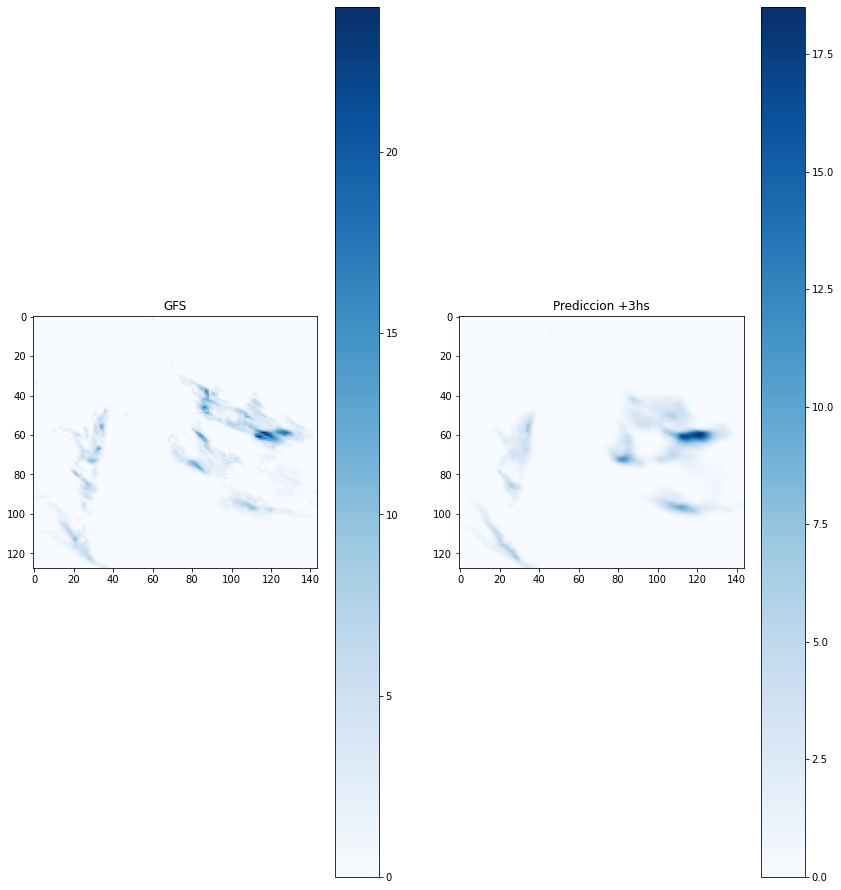

In [34]:
n = 10
m = n + 1
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(14, 16)
axs[0][0] = plt.subplot(121), plt.imshow(Y_test[n,:,:,0], cmap='Blues'), plt.colorbar(), plt.title('GFS')
axs[0][1] = plt.subplot(122), plt.imshow(y_pred[n,:,:,0], cmap='Blues'), plt.colorbar(), plt.title('Prediccion +3hs')

plt.show()